The [C] suffix at the start means that it is a student added comment provided to show understanding of the code.

In [1]:
# Library Imports
# [C] Imports lots of useful tools for QoL improvements
import pandas as pd
# [C] pandas is used for data manipulation and analysis
import numpy as np
import sklearn
import matplotlib.pyplot as pyplot
import pickle
from sklearn import linear_model
from sklearn.utils import shuffle
from matplotlib import style

In [2]:
# [C] Using the pd alias to call pandas, we are storing the contents of the csv file named 'student-mat' inside a pandas dataframe named data
# [C] The sep=";" segment specifies that the seperator between values in the CSV file is a semi-colon
data = pd.read_csv("student-mat.csv", sep=";")
# [C] The following line of code prints the "head" (first five rows) of the 'data' dataFrame
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [3]:
# [C] The following line of code redefines 'data' to only include the specific data relating to G1, G2, G3, studytime, failures and absences
# [C] This is done to narrow down the provided data in order to get only the relevant information
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
# [C] Once again the following line of code only prints the first five rows of the 'data' dataFrame
print(data.head())

   G1  G2  G3  studytime  failures  absences
0   5   6   6          2         0         6
1   5   5   6          2         0         4
2   7   8  10          2         3        10
3  15  14  15          3         0         2
4   6  10  10          2         0         4


In [4]:
# [C] The following line of code assigns the string G3 (also a column in the data dataFrame) to the predict variable
predict = "G3"

x = np.array(data.drop(predict, axis=1))
y = np.array(data[predict])

In [5]:
# Split the data set into train and test sets
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

Linear Regression

In [6]:
# [C] The following line creates a LinearRegression instance from scikit-learns linear-regression model
linear = linear_model.LinearRegression()

# Define the line of best fit
# [C] Trains the linear regression model of the training data
linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
print(acc)

0.8331497686223817


Save the model with pickle

In [7]:
# [C] Saves the linear regression model to the file 'studentmodel.pickle'
with open("studentmodel.pickle", "wb") as f:
    pickle.dump(linear, f)

In [8]:
# Load the pickle file
pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)

In [9]:
# [C] Opens, loads and prints the coefficient and intercept
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

Coefficient: 
 [ 0.14604182  0.97126511 -0.27335147 -0.35084982  0.03392972]
Intercept: 
 -1.102662282252938


In [10]:
# [C] Uses the trained linear regression model to make predictions 
predictions = linear.predict(x_test)

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x]) 

12.602273474315568 [13 13  3  0  0] 13
14.947085773142396 [16 15  4  0  7] 17
13.299641494751732 [15 14  3  2  4] 15
12.240416704020515 [11 13  4  0  6] 14
12.94348439456869 [13 13  2  0  2] 13
7.627157865695716 [ 9  8  2  1 16] 7
6.025741504617043 [6 7 2 0 0] 0
9.265647270851735 [11  9  1  1 19] 10
6.1583584320610845 [7 8 2 3 2] 9
18.676060898933514 [19 18  2  0  2] 18
11.80744528107275 [10 12  1  0  2] 12
9.640690858489341 [ 8 10  1  0  4] 10
12.474963827673646 [14 13  4  0  0] 14
4.286789629256032 [6 5 2 0 6] 6
5.123019868064661 [7 6 1 1 0] 0
10.708870522455205 [11 11  2  0  2] 10
15.091506639712899 [13 15  1  0  0] 15
11.951573432551136 [11 12  2  0 10] 13
8.114313552649405 [7 9 2 0 0] 8
11.75831800898187 [12 12  2  0  0] 11
6.317825152779284 [8 7 2 0 0] 8
15.245957716212247 [15 15  2  0  4] 15
13.4730761160862 [15 13  2  0  9] 15
15.324140090763288 [16 15  2  0  2] 15
19.910354556611217 [18 19  1  0  6] 19
8.552439024892767 [10  9  2  0  0] 9
10.708870522455205 [11 11  2  0  2] 11

Plot the data

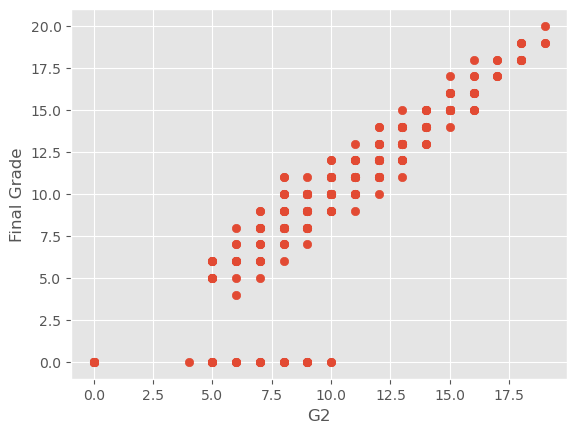

In [11]:
# [C] Uses the matplot library to create a scatter plot
style.use("ggplot")

# Set up a scatter plot
p = "G2"
pyplot.scatter(data[p], data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("Final Grade")
pyplot.show()